In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import Common_Functions as cmn

In [2]:
training_data = cmn.get_training_data()
training_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# Label encoding

We apply Label Encoding when:

* The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
* Nothing, Gravel, Pavement
    * i.e. 0, 1, 2

In [3]:
def ConvertStringToInt(df):
  columns_to_encode = list(df.select_dtypes(include=['category','object'])) #gets all columns with non-numeric values
  le = LabelEncoder()
  for feature in columns_to_encode:
      try:
          df[feature] = le.fit_transform(df[feature])
      except:
          print('Error encoding '+feature)
  return df

In [4]:
training_data = ConvertStringToInt(training_data)
training_data = training_data.replace({np.NaN:0})
training_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,62.0,7917,1,2,3,3,0,4,...,0,3,4,4,0,8,2007,8,4,175000
1457,20,3,85.0,13175,1,2,3,3,0,4,...,0,3,2,4,0,2,2010,8,4,210000
1458,70,3,66.0,9042,1,2,3,3,0,4,...,0,3,0,2,2500,5,2010,8,4,266500


In [5]:
columns_has_null = training_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

Series([], dtype: int64)

In [6]:
X_train = training_data.iloc[:, :-1]
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
2,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
3,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
4,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
5,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,62.0,7917,1,2,3,3,0,4,...,0,0,3,4,4,0,8,2007,8,4
1457,20,3,85.0,13175,1,2,3,3,0,4,...,0,0,3,2,4,0,2,2010,8,4
1458,70,3,66.0,9042,1,2,3,3,0,4,...,0,0,3,0,2,2500,5,2010,8,4


In [7]:
y_train = training_data.iloc[:, -1:]
y_train

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


In [8]:
forest = RandomForestRegressor()
forest.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

In [9]:
print("train score:", forest.score(X_train,y_train))

train score: 0.981302657573691


# Testing training data on the training dataset with a 0.75 to 0.25 ratio training data - testing data

In [10]:
X = training_data.iloc[:, :-1]
y = training_data.iloc[:, -1:]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, train_size=0.75)
display(X_train, y_train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
7,20,3,75.0,10084,1,2,3,3,0,4,...,0,0,3,4,4,0,8,2007,8,4
808,70,3,144.0,21384,1,2,3,3,0,4,...,0,0,3,4,4,0,5,2009,8,4
956,90,2,82.0,7136,1,2,0,1,0,4,...,0,0,3,4,4,0,8,2007,8,4
1041,20,3,88.0,13125,1,2,3,3,0,0,...,0,0,3,0,4,0,1,2006,8,4
702,20,3,80.0,9600,1,2,3,3,0,4,...,0,0,3,4,4,0,7,2006,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,20,3,78.0,10140,1,2,3,3,0,4,...,0,0,3,2,4,0,8,2009,8,4
906,20,3,80.0,9920,1,2,3,3,0,4,...,0,0,3,2,4,0,2,2010,8,4
1097,70,4,60.0,6882,1,2,3,3,0,4,...,0,0,3,4,4,0,3,2007,8,4


,SalePrice
Id,
7,307000
808,223500
956,145000
1041,155000
702,140000
...,...
716,165000
906,128000
1097,127000


In [12]:
forest = RandomForestRegressor()
forest.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

## Show the difference in training and testing data to the one without string. (Sometimes without strings is better)
Labelencoder seems to be doing a bad job, bad weighting on the labels and the magnitude/order is not being taken into consideration.

In [13]:
print("model score on training data:", forest.score(X_train, y_train))
print("model score on test data:", forest.score(X_test, y_test))

model score on training data: 0.9770982465368736
model score on test data: 0.8931540594660302


In [14]:
sns.set_context("paper")
sns.set_style("ticks")

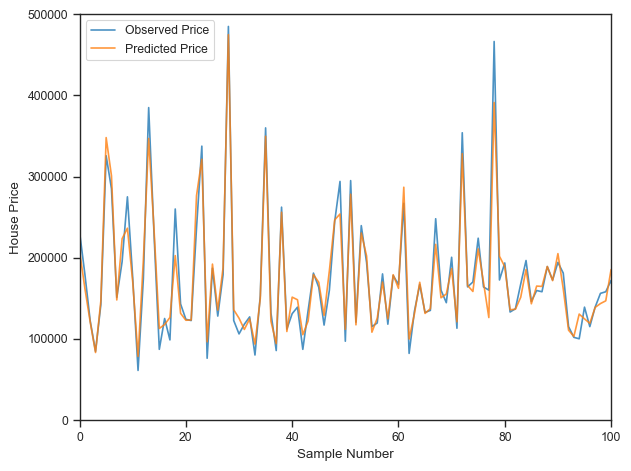

In [15]:
cmn.plot_observed_vs_predicted(observed=y_test.to_numpy(), predicted=forest.predict(X_test))

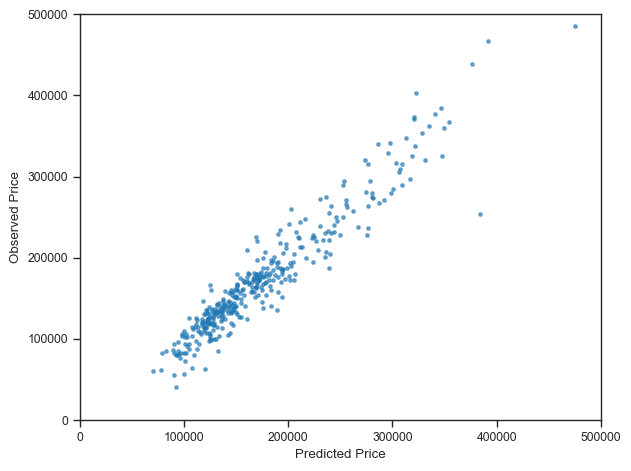

In [16]:
cmn.plot_single_scatter(observed=y_test.to_numpy(), predicted=forest.predict(X_test))

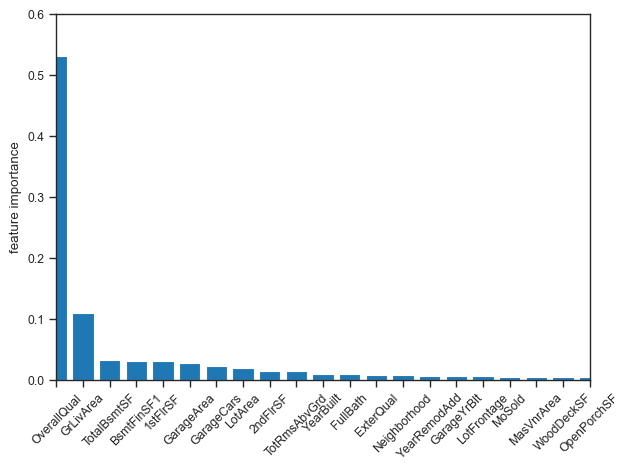

In [17]:
cmn.plot_feature_importance(x_val=X_train, forest=forest)